In [3]:
from functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage
import ast

# Image Segmentation

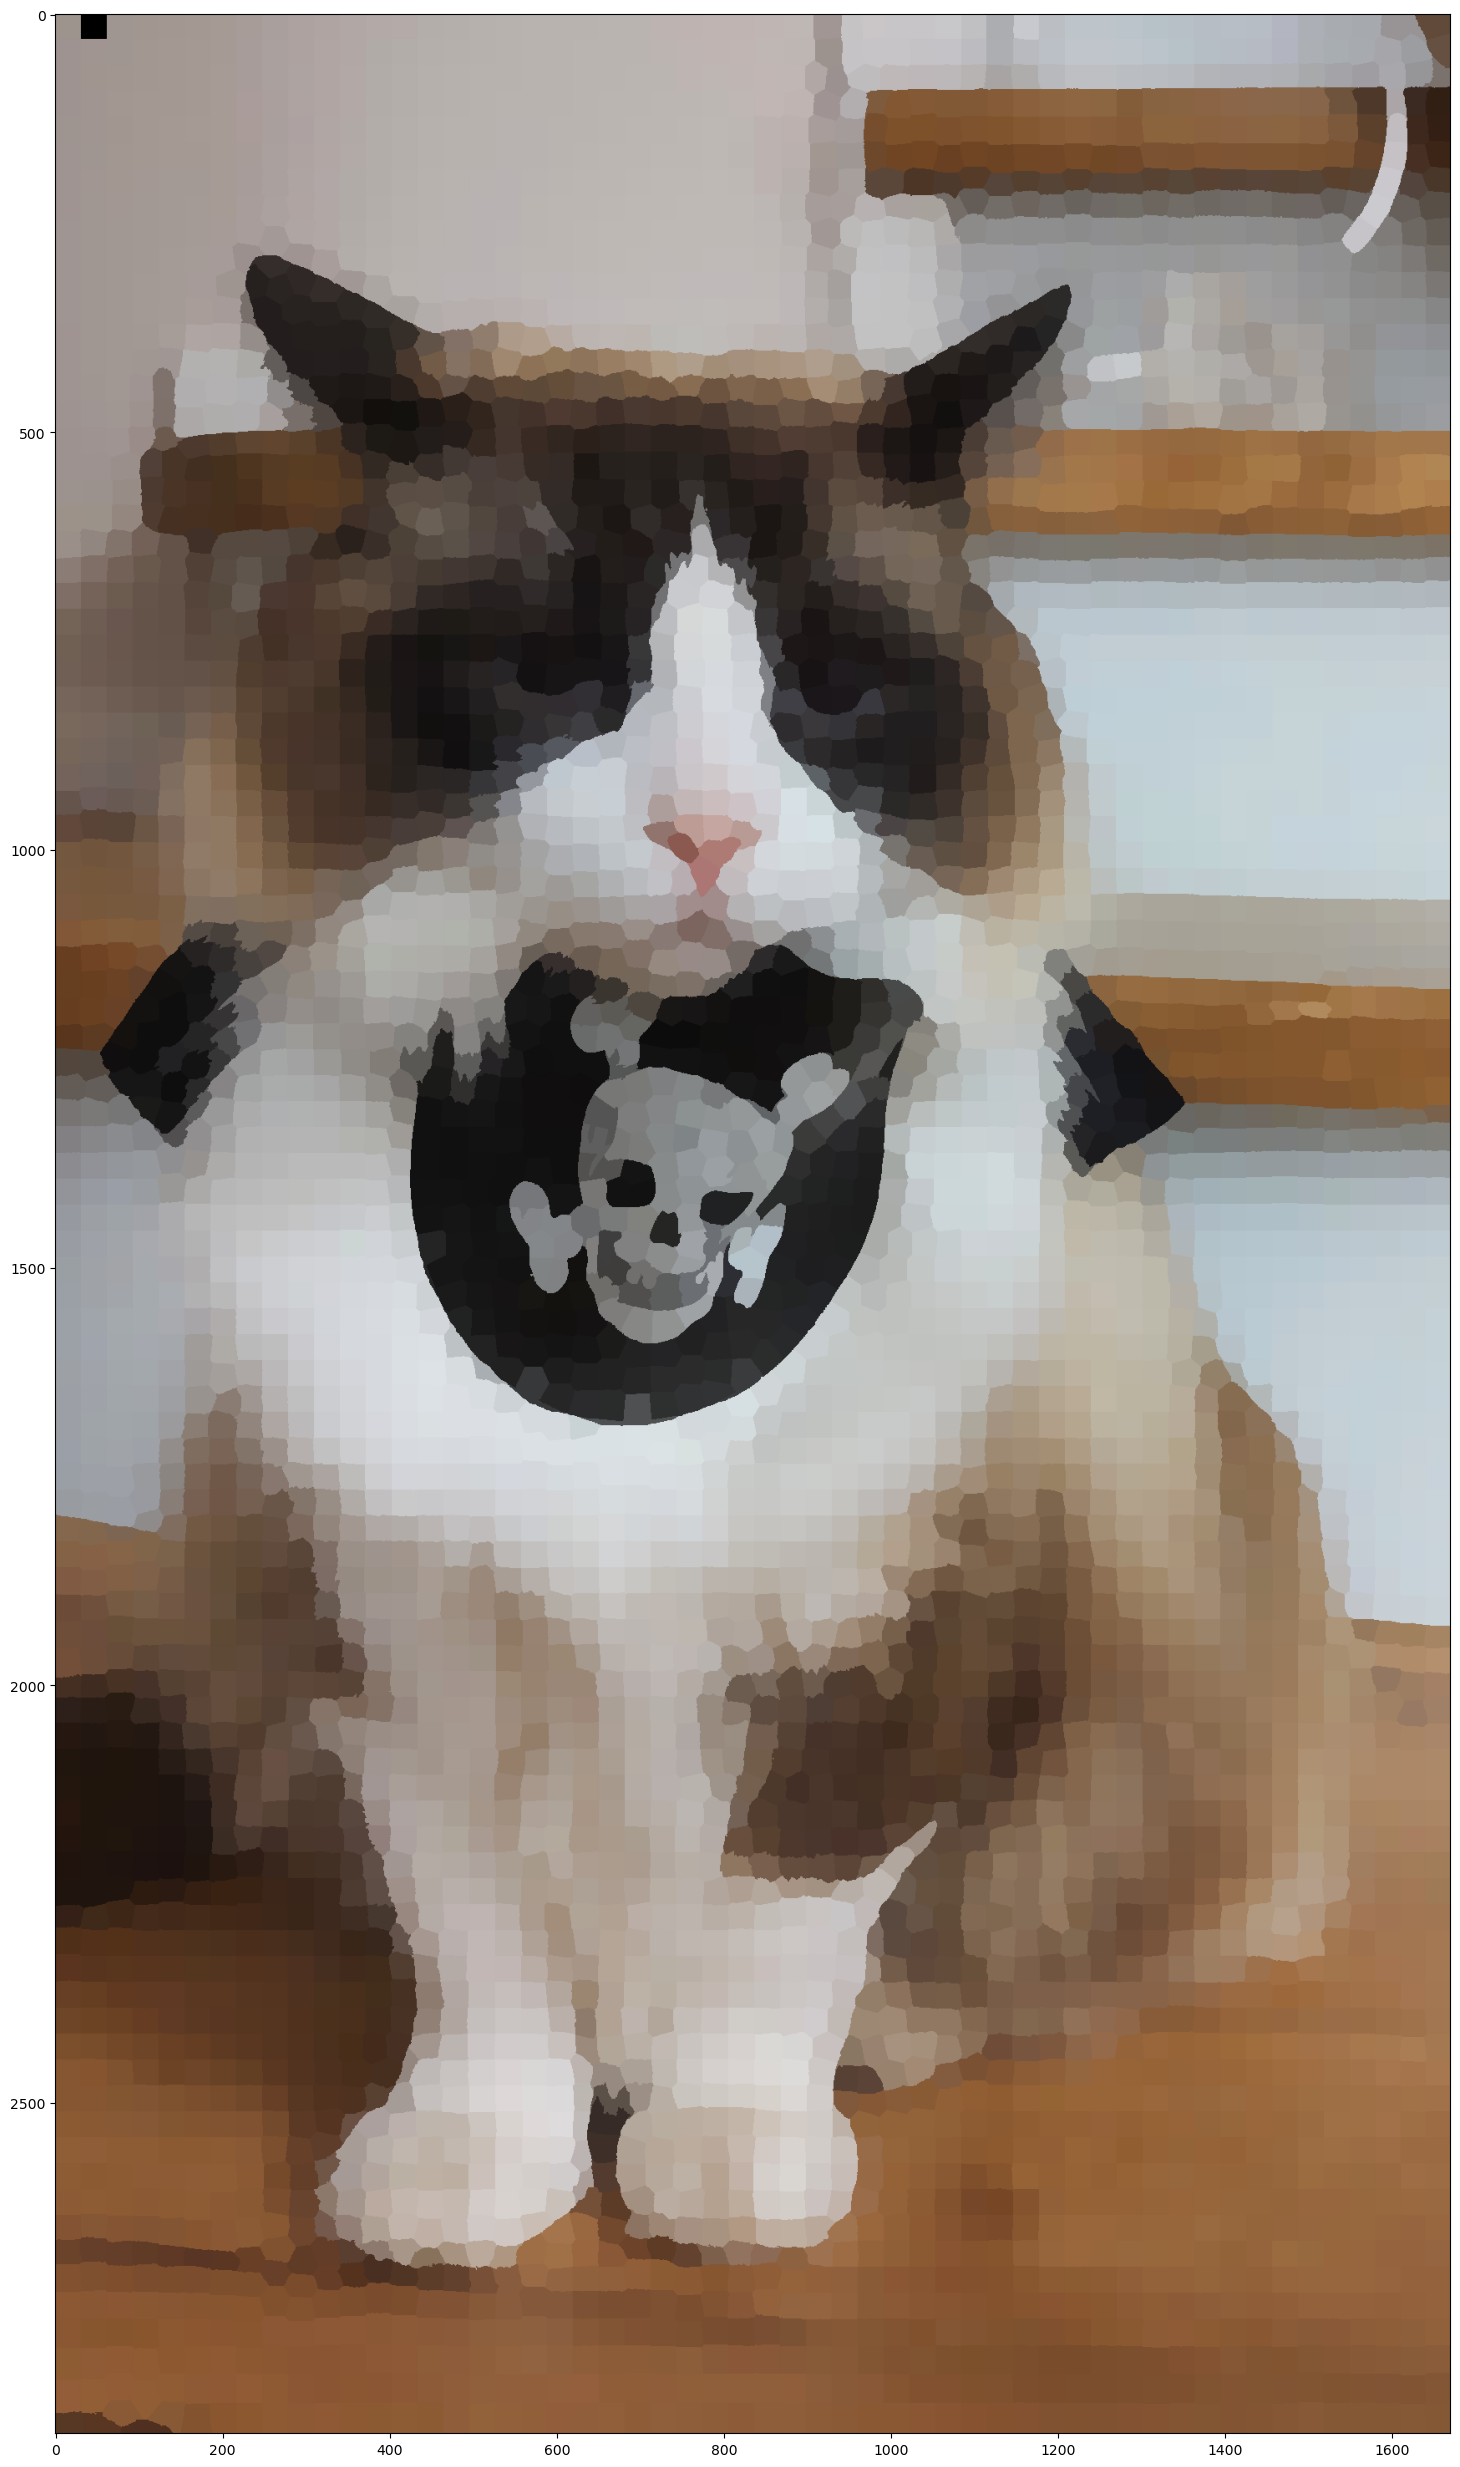

In [4]:
path = "../images/buc.jpeg"
img = skimage.io.imread(path)
#img_blur = cv2.medianBlur(img, 15)
#img_blur = cv2.GaussianBlur(img,(21,21),0)
out = segment_image(img)

plt.figure(figsize=(18, 32))
plt.imshow(out)
plt.show()

# K-Means Clustering

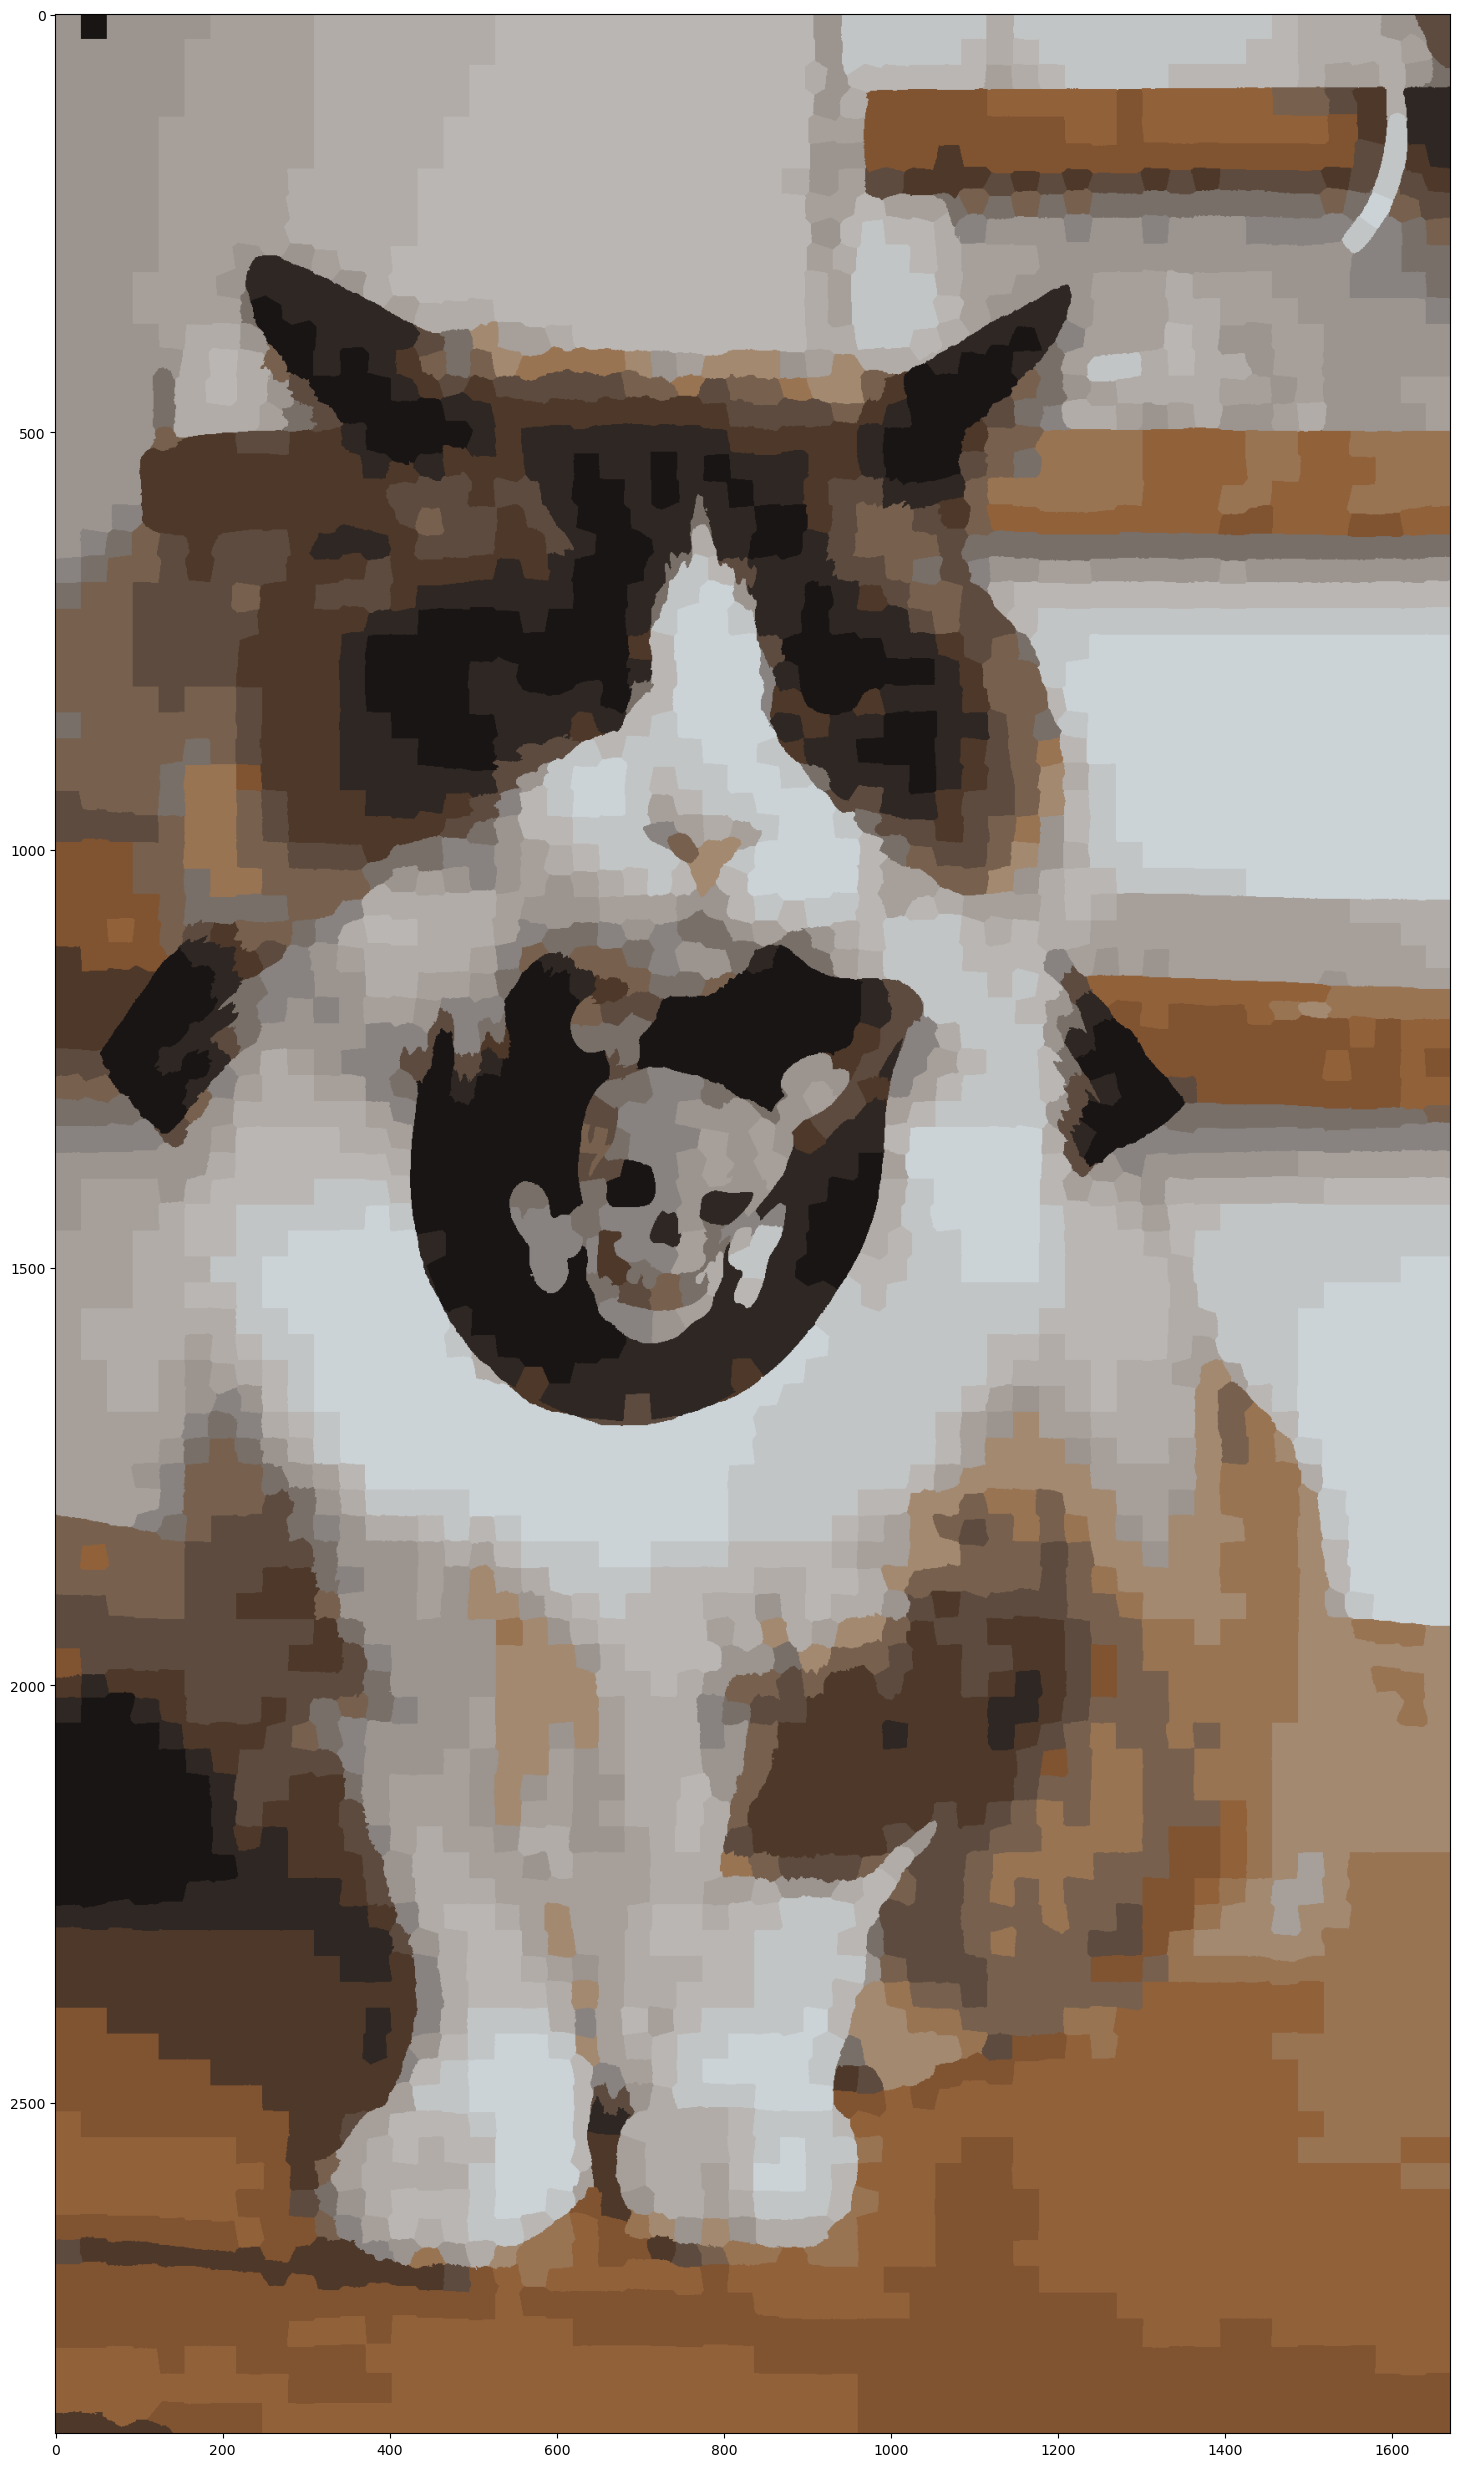

In [11]:
result_image = perform_kmeans_clustering(out, blur=False, blur_effect=3)

plt.figure(figsize=(18, 32))
plt.imshow(result_image)
plt.show()

# Create Borders & Add Numbers

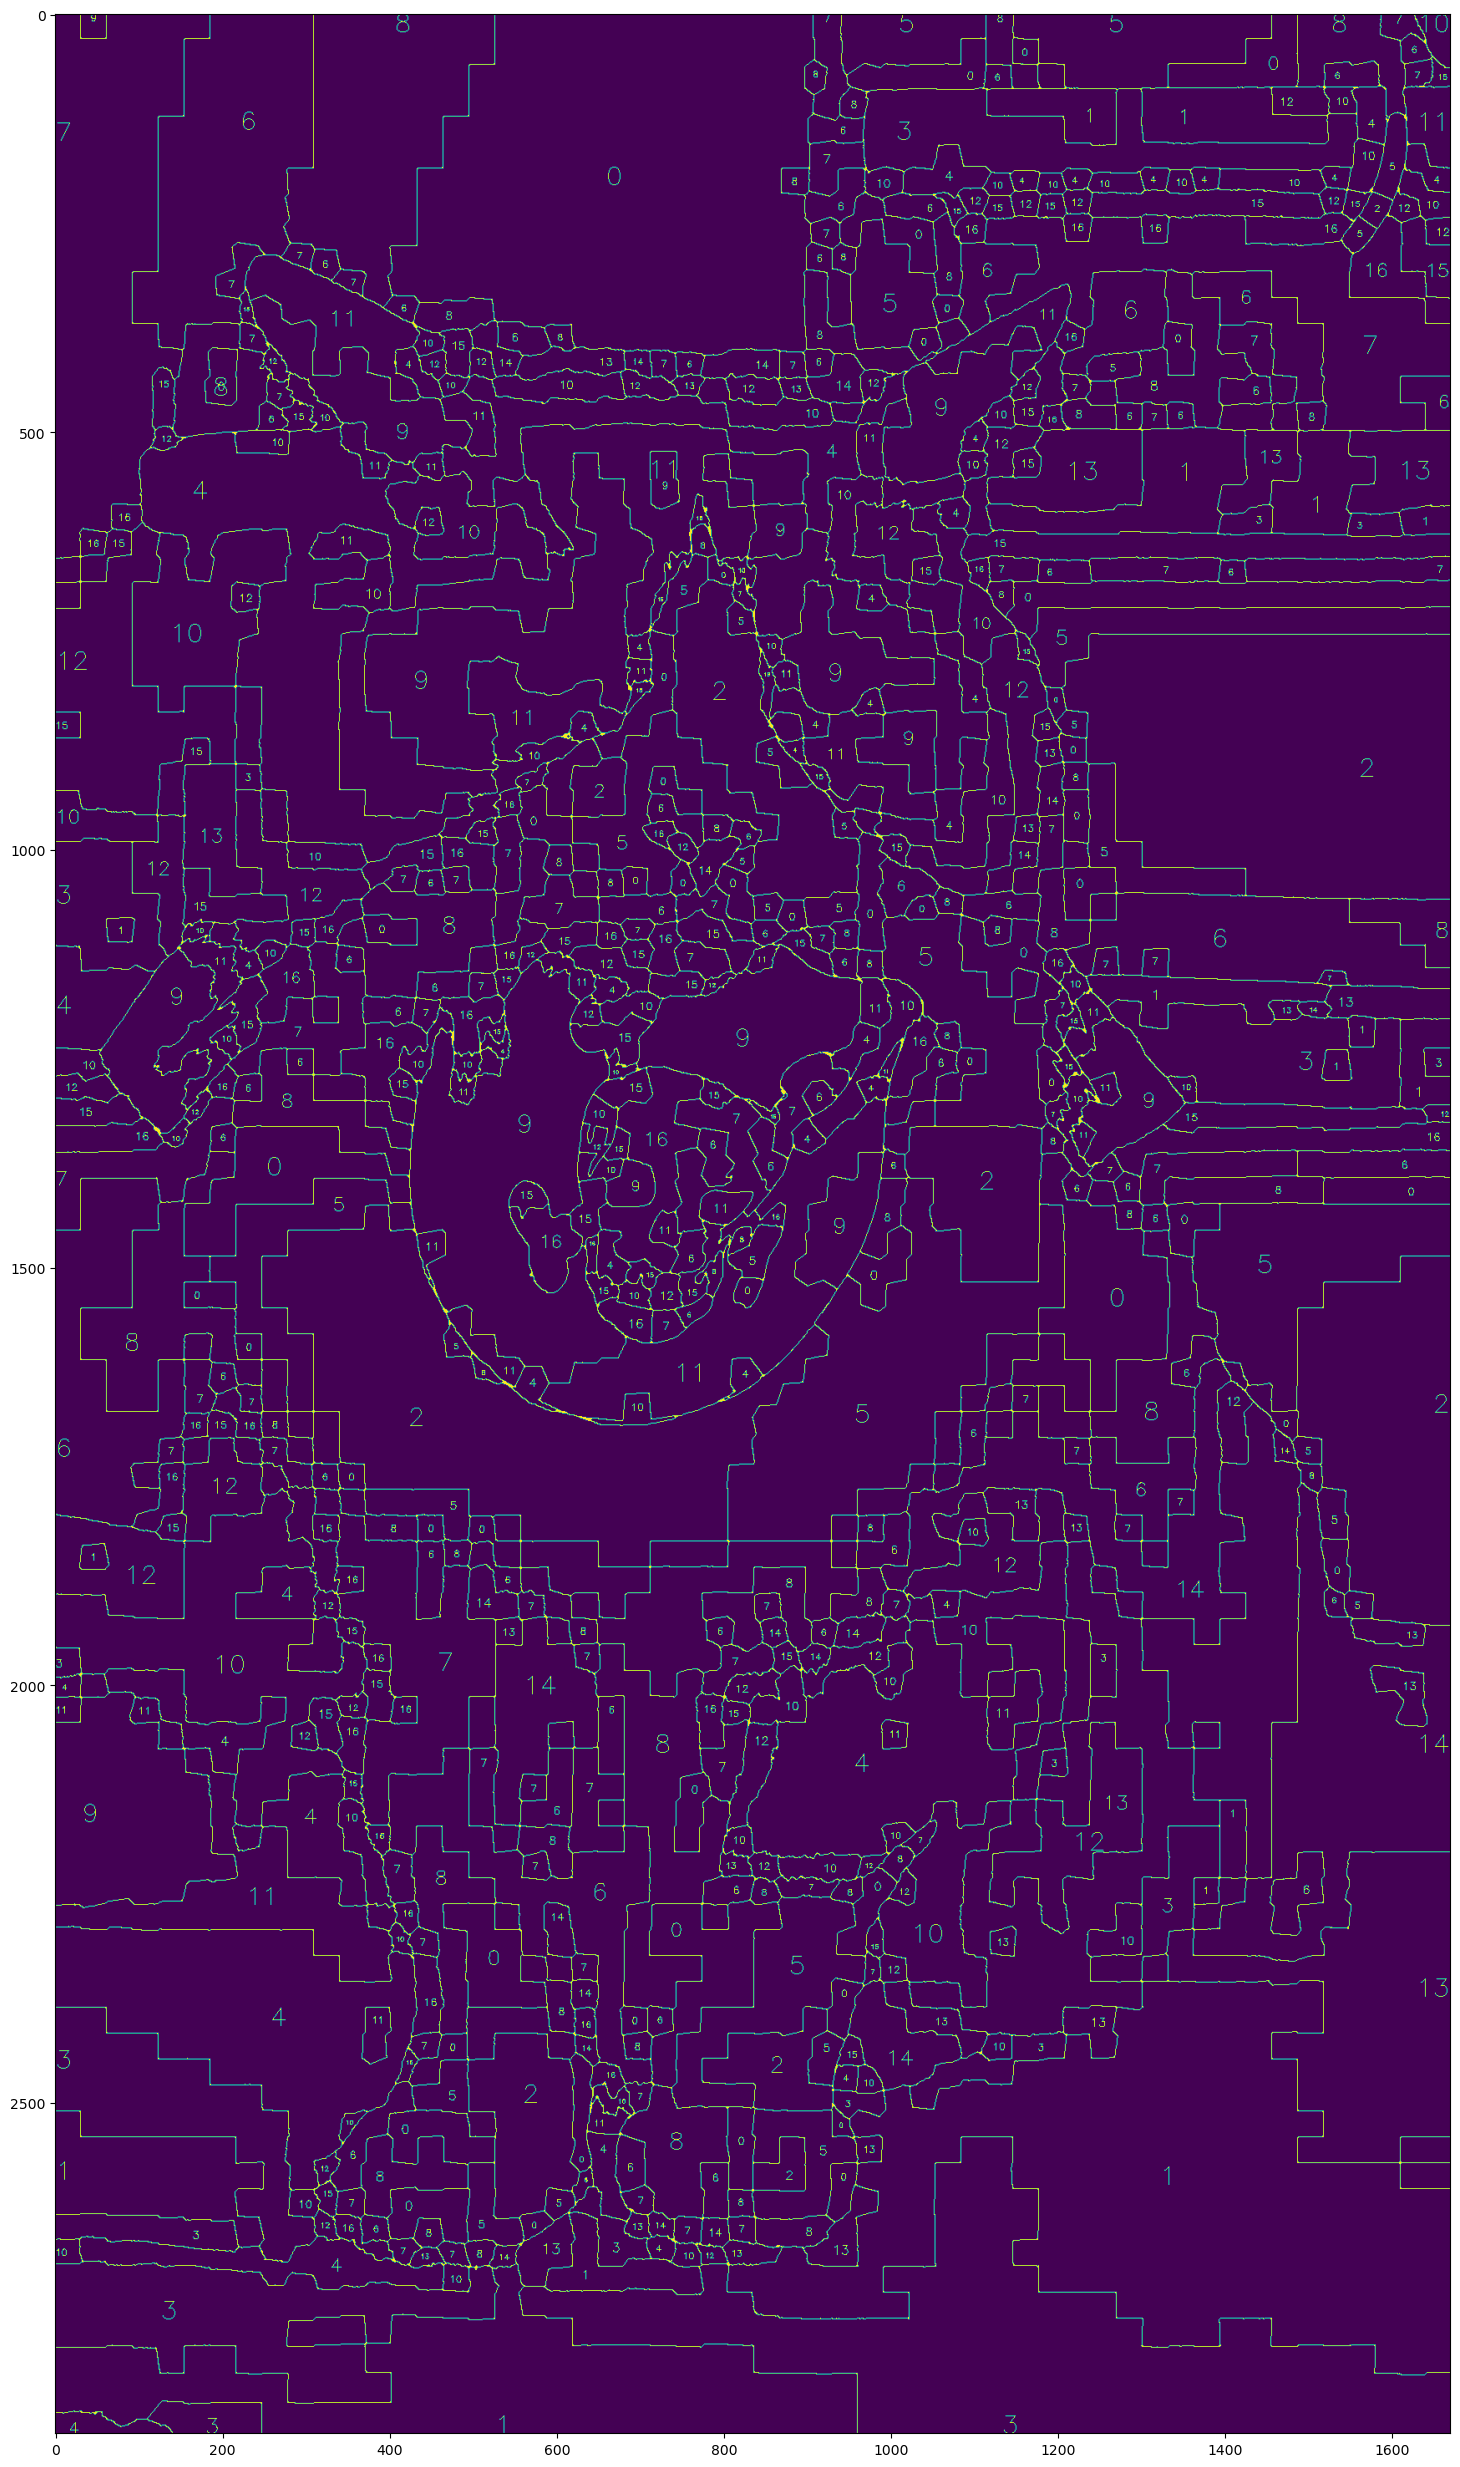

In [12]:
borders = create_borders(result_image)

image_colors = return_colors(result_image)

borders_with_numbers = add_numbers_to_borders(result_image, borders, image_colors)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
plt.show()

# Testing Colors

In [7]:
paints = pd.read_csv("paints.csv")
paint_names = np.array(paints['paint_name'])
paint_rgbs = np.array([ast.literal_eval(rgb) for rgb in paints['rgb']])

In [8]:
closest_paint_colors = find_closest_colors(image_colors)
print(return_paint_names(closest_paint_colors))

['T9', 'H9', 'R9', 'X4', 'U1', 'D1', 'X3', 'F1', 'I1', 'G1', 'B2', 'D3', 'D5', 'Q4', 'P1', 'B9', 'F5']


In [9]:
# Find the closest paint colors to the image colors
closest_paint_colors = find_closest_colors(image_colors)
print(f'Unique colors: {len(np.unique(closest_paint_colors, axis=0))}')

for i, color in enumerate(closest_paint_colors):
    print(
        f"Closest paint color to image color {image_colors[i]} is {color} = {paint_names[np.where((paint_rgbs == color).all(axis=1))][0]}")


Unique colors: 17
Closest paint color to image color [184 179 174] is [181 170 171] = T9
Closest paint color to image color [202 210 213] is [198 209 213] = H9
Closest paint color to image color [143  95  56] is [153 103  61] = R9
Closest paint color to image color [160 152 146] is [157 146 142] = X4
Closest paint color to image color [191 193 194] is [188 196 187] = U1
Closest paint color to image color [79 57 42] is [79 49 39] = D1
Closest paint color to image color [169 164 160] is [172 162 162] = X3
Closest paint color to image color [25 21 20] is [18 22 23] = F1
Closest paint color to image color [126  82  48] is [147  79  55] = I1
Closest paint color to image color [48 40 36] is [12 26 46] = G1
Closest paint color to image color [94 77 64] is [91 77 68] = B2
Closest paint color to image color [120  98  80] is [118  90  81] = D3
Closest paint color to image color [164 139 115] is [172 140 116] = D5
Closest paint color to image color [141 137 134] is [131 130 135] = Q4
Closest pain

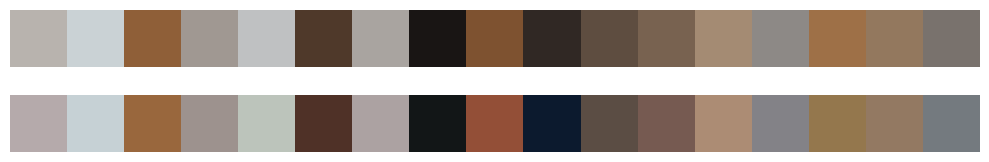

In [10]:
n = len(image_colors)

cmap_original = np.reshape(np.array(image_colors), (1, n, 3))
cmap_paints = np.reshape(np.array(closest_paint_colors), (1, n, 3))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 2), facecolor='white', gridspec_kw={'hspace': 0}, layout="tight")

ax1.imshow(cmap_original)
ax2.imshow(cmap_paints)

ax1.axis('off')
ax2.axis('off')

#plt.savefig('hehe.jpg')
plt.show()